<a href="https://colab.research.google.com/github/Vedant0402/EDA_reusable_code/blob/main/EDA(Day-3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day-3 --> Missing Values: Detection & Imputation




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Missing value counts
print("Missing values--", df.isnull().sum())

Missing values-- survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
# Missing values in percentage
missing_percent = (df.isnull().sum()/len(df))*100
print("\nMissing value % \n", missing_percent)


Missing value % 
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


#### Observation --> "Age", "deck", "embarked", "embark_town" columns contains 19.8, 77.2, 0.2, 0.2 percent of missing values respectively.


<Figure size 800x400 with 0 Axes>

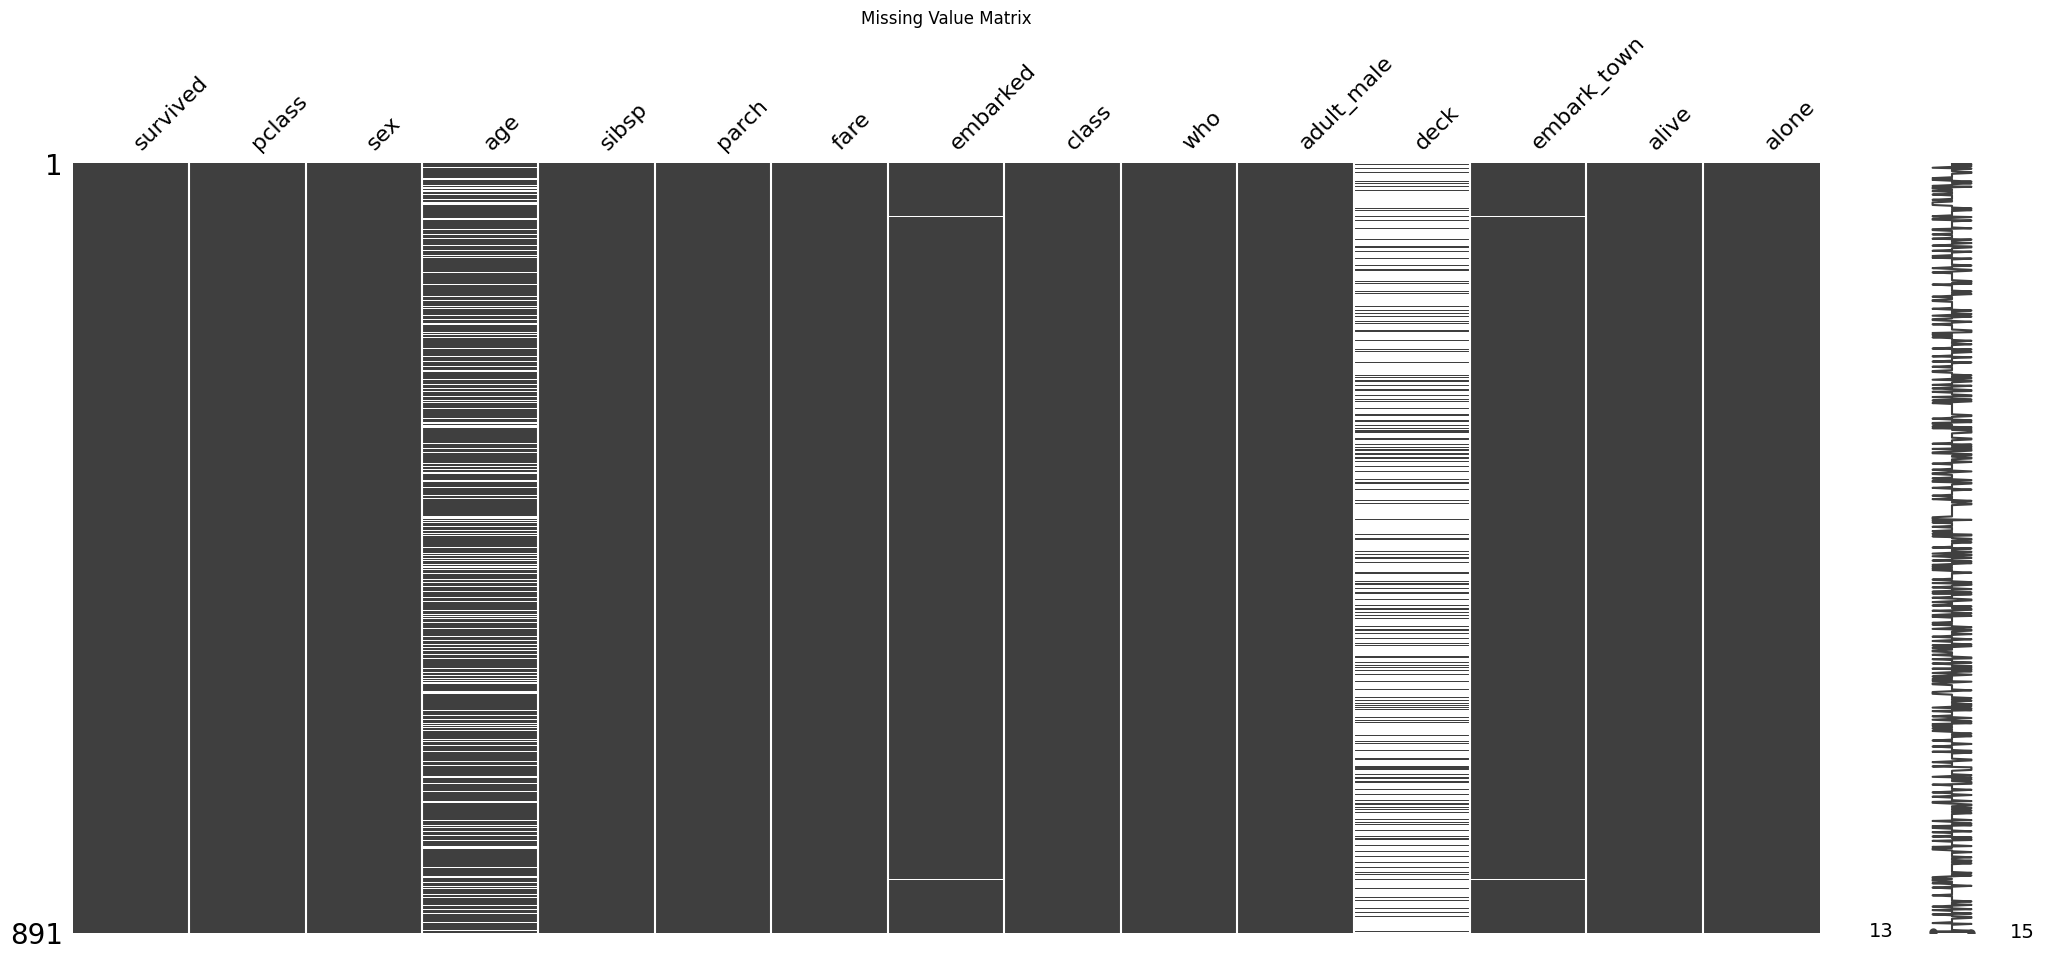

<Figure size 800x400 with 0 Axes>

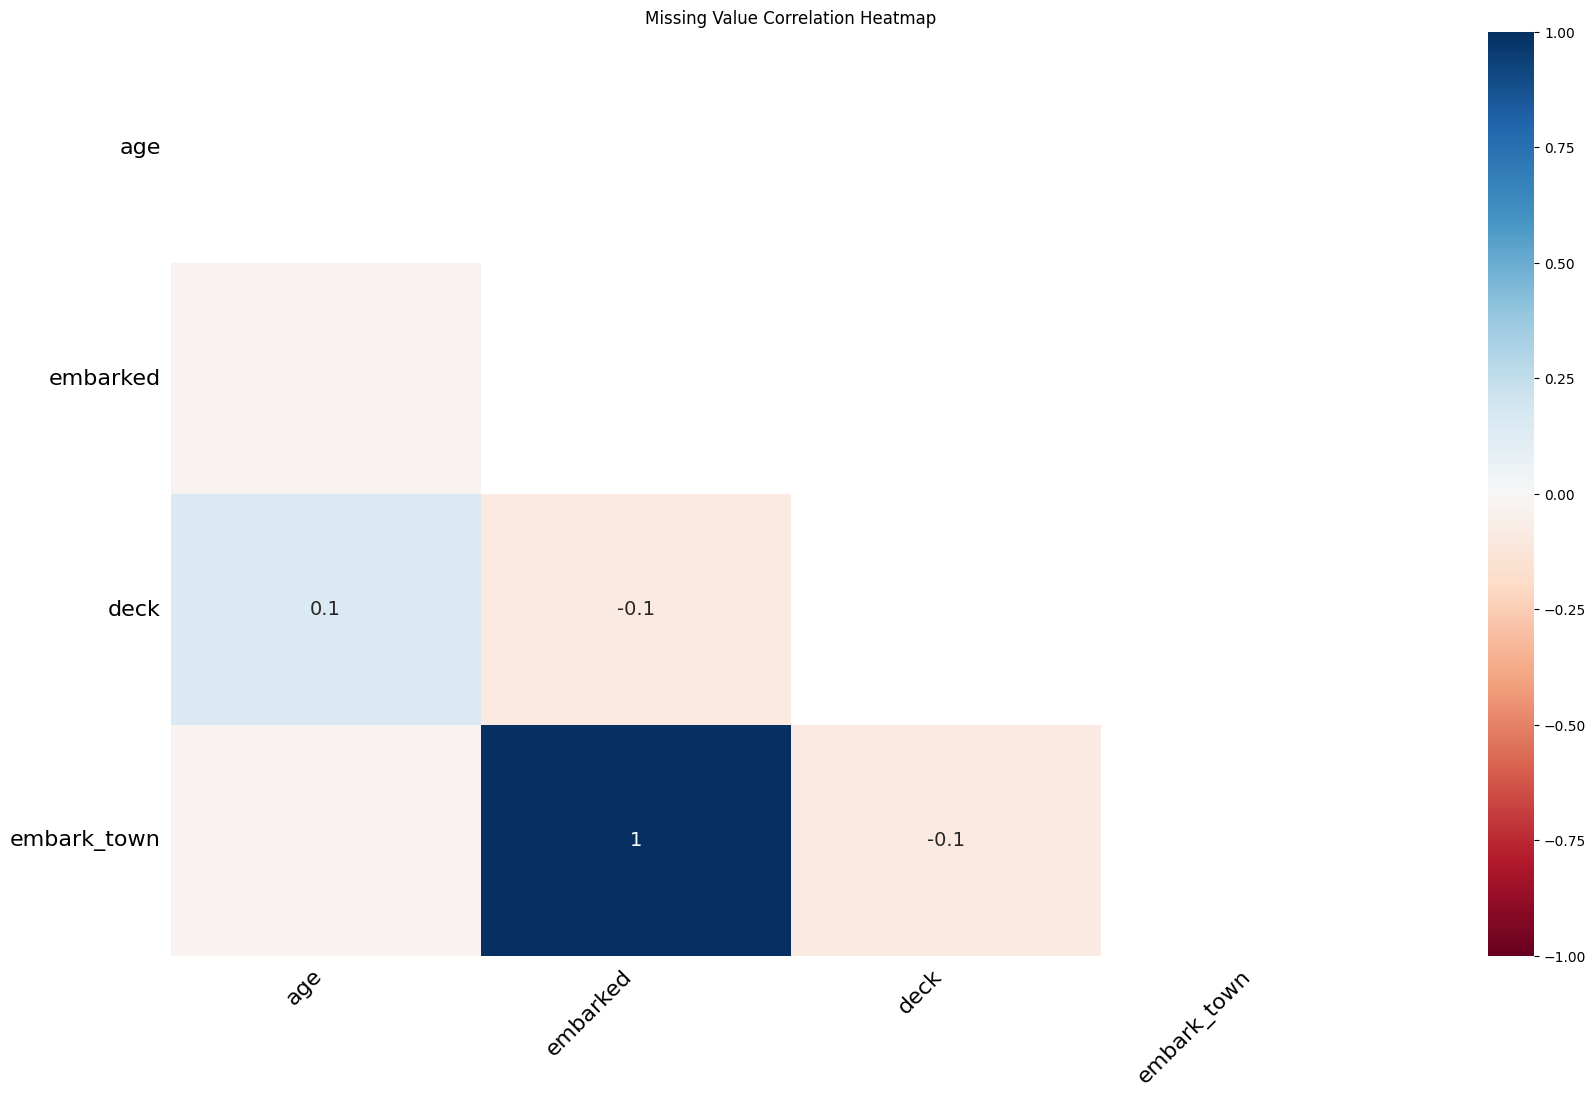

In [5]:
# Visualizing Missing values

import missingno as msno

plt.figure(figsize=(8,4))
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

plt.figure(figsize=(8,4))
msno.heatmap(df)
plt.title("Missing Value Correlation Heatmap")
plt.show()

#### Observation --> positive correlation between embarked and embark_town.

In [6]:
# Imputation Methods-->

# Numerical Features
df['age'] = df['age'].fillna(df['age'].median())

In [7]:
# Categorical Features
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [8]:
df = df.drop(columns=['deck'])


In [9]:
# Group-Based Imputation
df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))

In [10]:
# KNN Imputation
from sklearn.impute import KNNImputer

# Select numeric columns
num_cols = df.select_dtypes(include=np.number)

imputer = KNNImputer(n_neighbors=5)
num_imputed = imputer.fit_transform(num_cols)

# Replace numeric columns with imputed values
df[num_cols.columns] = num_imputed


In [11]:
# Verify Missing Value Handling
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


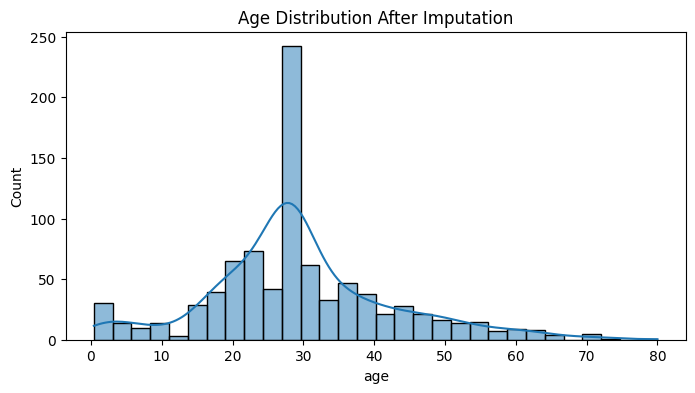

In [12]:
# Visualize before and after
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution After Imputation")
plt.show()